In [80]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report, log_loss
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore');

# **0. ИМПОРТ ДАННЫХ**
**Описание полей. Предсказываем флага зачисление вклада клиентом:**

<dd>• age       - возраст клиента </dd>
<dd>• job       - тип работы </dd>
<dd>• marital   - статус замужества</dd>
<dd>• education - степень образования </dd>
<dd>• default   - дефолтил ли клиент? </dd>
<dd>• housing   - есть ли жилищный кредит? </dd>
<dd>• loan      - есть ли потребительский кредит? </dd>
<dd>• contact   - тип коммуникации </dd>
<dd>• month     - месяц последнего контакта </dd>
<dd>• day_of_week   - день недели последнего контакта </dd>
<dd>• duration      - длительность последнего звонка </dd>
<dd>• campaign      - количество звонков в течение маркетинговой кампании </dd>
<dd>• pdays     - как давно не было коммуникации с клиентом, относительно предыдущей маркетинговой кампании </dd>
<dd>• previous  - количество звоноков до текущей маркетинговой компании </dd>
<dd>• poutcome  - результат предыдущей маркентинговой кампании относительно выбранного клиента </dd>
<dd>• emp.var.rate      - коэффициент вариации безработицы (quarterly) </dd>
<dd>• cons.price.idx    - индекс потребительских цен (monthly) </dd>
<dd>• cons.conf.idx:    - индекс потребительской уверенности (monthly) </dd>
<dd>• euribor3m         - межбанковская европейская ставка предложения по трехмесячному займу (daily) </dd>
<dd>• nr.employed       - количество занятых </dd>
<dd>• y                 - таргетная переменная: взял ли клиент депозит </dd>
</dl>

In [215]:
data_ = pd.read_csv("data/banking.csv")
data_

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## **1. ВВЕДЕНИЕ.** 
**РАССМОТРИМ ВЫБОРКУ НА ПРОПУСКИ, ВЫБРОСЫ, ПРОВЕРИМ БАЛАНС ВЫБОРКИ, СОСТАВ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ**

In [96]:
#Смотрим пропуски
data_.info()
# Примечание: пропуски отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### **1.1 Состав категориальных признаков**

In [97]:
#Выделим количество уникальных значений категориальных переменных
data_.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


*Примечание: величина категорий не критична*

### **1.2 Анализ на наличие выбросов**

In [98]:
# Анализируем выбросы
data_.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


*Примечание - наблюдаем выбросы в :*
- duration - длительность последнего звонкаи 
- campaign - количество звонков в течение маркетинговой кампании

### **1.3 Рассмотрим баланс выборки**

------------------------------------------------------
   TARGET_VALUE  PERCENTAGE
0             0        89.0
1             1        11.0
------------------------------------------------------


Text(225.84722222222223, 0.5, 'КЛАССЫ')

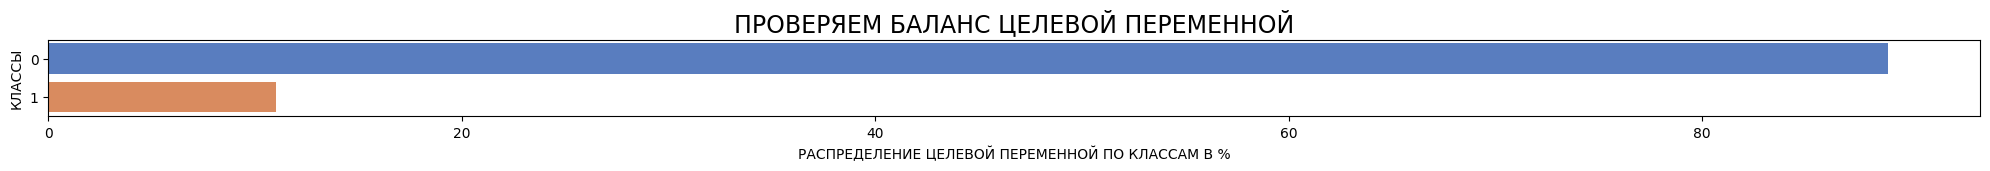

In [99]:
# Выразим значения долей выборки
percentage_target = data_.y.value_counts(normalize=True) \
                    .mul(100) \
                    .round() \
                    .rename('PERCENTAGE') \
                    .reset_index() \
                    .rename({'y': 'TARGET_VALUE'}, axis=1)
print("------------------------------------------------------")
print(percentage_target)
print("------------------------------------------------------")
# Визуализируем полученные данные баланса выборки
plt.figure(figsize=(20,1.5))
sns.barplot(data=percentage_target, x='PERCENTAGE', y='TARGET_VALUE', orient='h', palette='muted')
plt.tight_layout()
plt.title('ПРОВЕРЯЕМ БАЛАНС ЦЕЛЕВОЙ ПЕРЕМЕННОЙ', fontsize=17)
plt.xlabel('РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ПО КЛАССАМ В %')
plt.ylabel('КЛАССЫ')

*Примечание*

*Наблюдается дисбаланс классов, треубется учесть это при обучении модели и делении данных.*

# **2 EXPLORATORY DATA ANALYSIS**
**ВЫДЕЛИМ ГИПОТЕЗЫ И ПРОВЕДЕМ НАБЛЮДЕНИЯ:**

2.1. Комбинация длительности последнего звонка и количества звонков в течение маркетинговой кампании: Клиенты, с которыми проводили длинные и продолжительные разговоры, а также те, с кем было сделано больше звонков в рамках кампании, могут быть более заинтересованы в продуктах банка и, следовательно, более склонны к оформлению вкладов.

2.2. Комбинация банковской ставки и индекса потребительских цен. 
Мы можем предположить что совместно эти параметры являются показателем экономической активности и степени инфляции системы. Поэтому предположим, что клиенты могут быть менее склонны к вложению своих средств если это не сохраняет покупательную способность.

2.3 Гипотеза о сегментации возраста клиента 
Возможна замена числового значения возраста на категориальный флаг (например, "молодой клиент") улучшит интерпретацию этого параметра моделью и учтет особенности возрастных групп в поведении относительно открытия депозитов.

2.4 Гипотеза о образовании клиента
Возможно, есть связь между профессиональной деятельностью и уровнем образования клиента, которая может влиять на решение о вкладе. Например, высокообразованные специалисты могут иметь более высокую финансовую грамотность и больше доверия к банковским продуктам.

2.5 Комбинации возраста и образования: 
Молодые клиенты с низким уровнем образования могут иметь менее устойчивые финансовые потребности и меньше интереса к долгосрочному инвестированию, что может отразиться на их склонности к открытию вкладовРассмотрим распределения возраст - образование в контексте целевой переменной

2.6 При выгодных ставках и низком коэффициенте вариации безработиц люди проявляют больший интерес к открытию вкладов 
Гипотеза : Выгодные ставки на вклады могут стимулировать клиентов открывать депозиты. Либо комбинация низкого коэффициента вариации безработицы и высоких ставок на вклады может сигнализировать о стабильности, что стимулирует их к откладыванию денег на вклады.

2.7. Гипотеза о влиянии образования и наличия жилищного кредита на решение о депозите:
Гипотеза клиенты с высшим образованием и без жилищного кредита имеют более высокую вероятность открывать депозит.


## 2.1 Гипотеза: Комбинация длительности последнего звонка и количества звонков в течение маркетинговой кампании: 
Клиенты, с которыми проводили длинные и продолжительные разговоры, а также те, с кем было сделано больше звонков в рамках кампании, могут быть более заинтересованы в продуктах банка и, следовательно, более склонны к оформлению вкладов.

------------------------------------------------------
ВЫБРОСЫ УДАЛЕНЫ - 2296 СТРОК (-5.9% ДАТАСЕТА)
------------------------------------------------------


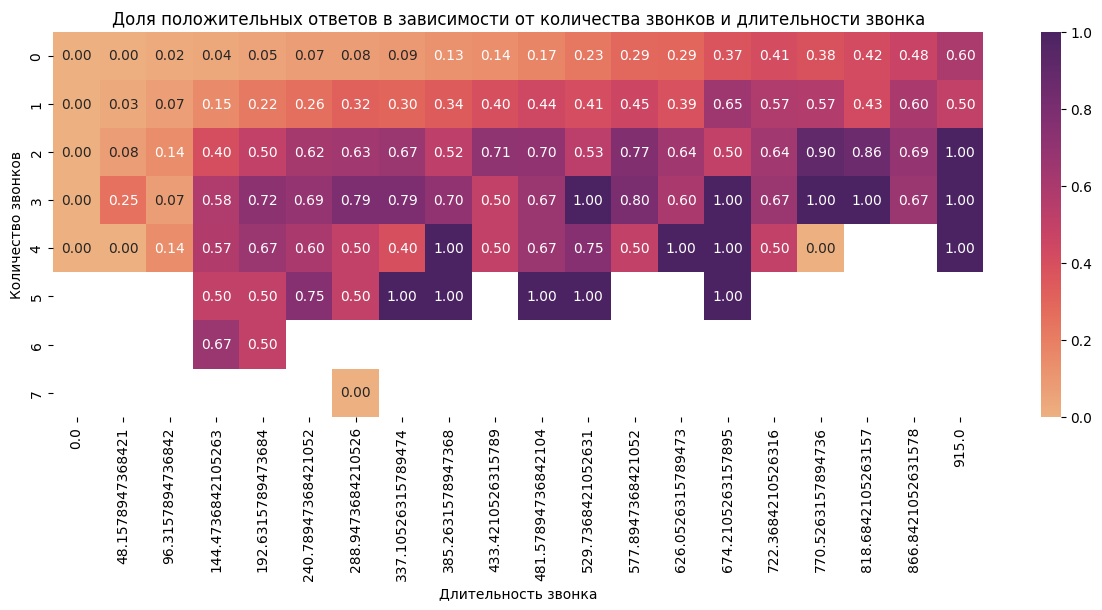

In [176]:
# Ранее были зафиксированы выбросы в duration
# Удалим выбросы с замером процентной доли удаленной части 
before = data_.shape[0]
data_ = data_[data_.campaign.between(data_.campaign.quantile(q=0),data_.campaign.quantile(q=0.97))]
data_ = data_[data_.duration.between(data_.duration.quantile(q=0),data_.duration.quantile(q=0.97))]
after = data_.shape[0]
print("------------------------------------------------------")
print(f'ВЫБРОСЫ УДАЛЕНЫ - {before - after} СТРОК ({round((1- before/after)*100, 2)}% ДАТАСЕТА)')
print("------------------------------------------------------")

# Создание сводной таблицы с долей положительных ответов в зависимости от количества звонков и длительности звонка
pivot = data_.pivot_table(index='previous', columns=pd.cut(data_['duration'], bins=20, labels=np.linspace(0, 915, 20)), values='y', aggfunc='mean')

# Построение тепловой карты для визуализации
plt.figure(figsize=(15, 5))
sns.heatmap(pivot, cmap='flare', annot=True, fmt=".2f")
plt.xlabel('Длительность звонка')
plt.ylabel('Количество звонков')
plt.title('Доля положительных ответов в зависимости от количества звонков и длительности звонка')
plt.show()

In [177]:
# Подготовим пивот для объединения с общей таблицей
combined_parameter = pivot.stack().reset_index()

# Создание колонки для объединения
combined_parameter['merge_column'] = round(combined_parameter['duration'].astype(int)/ 50) * 50
combined_parameter.rename(columns={0: 'calls_to_duration'}, inplace=True)
combined_parameter

,previous,duration,calls_to_duration,merge_column
0,0,0.000000,0.000482,0.0
1,0,48.157895,0.004937,50.0
2,0,96.315789,0.024246,100.0
3,0,144.473684,0.035774,150.0
4,0,192.631579,0.052339,200.0
...,...,...,...,...
105,5,529.736842,1.000000,550.0
106,5,674.210526,1.000000,650.0
107,6,144.473684,0.666667,150.0
108,6,192.631579,0.500000,200.0


In [178]:
# Создание колонки для объединения
data_['merge_column'] = round(data_['duration']/ 50) * 50

# Добавление параметра в общую таблицу
data_ = pd.merge(data_, combined_parameter[['merge_column','previous', 'calls_to_duration']], 
                                            on=['merge_column', 'previous'], 
                                            how='left') \
                                            .drop('merge_column', axis=1)
pd.DataFrame(data_['calls_to_duration'])

,calls_to_duration
0,0.052339
1,0.035774
2,0.666667
3,0.052339
4,0.149300
...,...
39378,0.052339
39379,0.052339
39380,0.004937
39381,0.052339


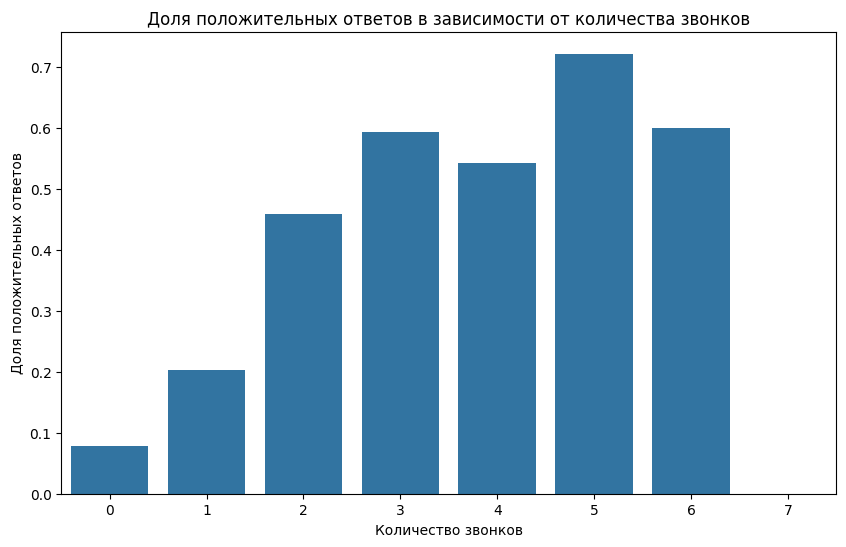

In [179]:
# Группировка данных по количеству звонков и расчет доли положительных ответов
positive_response_rate = data_.groupby('previous')['y'].mean().reset_index()

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=positive_response_rate, x='previous', y='y')
plt.xlabel('Количество звонков')
plt.ylabel('Доля положительных ответов')
plt.title('Доля положительных ответов в зависимости от количества звонков')
plt.show()

## 2.2 Гипотеза: Банковская ставка и индекс потребительских цен 
Совместно эти параметры являются показателем экономической активности и степени инфляции системы. Предположим, что клиенты могут быть менее склонны к вложению своих средств если это не сохраняет покупательную способность.

In [180]:
# Нормализация данных для приведения к общему порядку значений
normalized_euribor3m = (data_['euribor3m'] - data_['euribor3m'].mean()) / data_['euribor3m'].std()
normalized_cons_price_idx = (data_['cons_price_idx'] - data_['cons_price_idx'].mean()) / data_['cons_price_idx'].std()

# Создание комбинированного параметра через умножение параметров подразумевает учет их взаимодействия и влияния друг на друга. Он отражает не только уровень ставки, но и его влияние на покупательную способность  денег в условиях инфляции. 
data_['euribor3m_to_cons_price_idx'] = normalized_euribor3m * normalized_cons_price_idx

pd.DataFrame(data_['euribor3m_to_cons_price_idx']).sort_values('euribor3m_to_cons_price_idx', ascending=False)



,euribor3m_to_cons_price_idx
21745,3.737793
8945,3.737793
38992,3.737793
38444,3.737793
20740,3.737793
...,...
546,-3.045998
20839,-3.045998
26229,-3.045998
32141,-3.045998


## 2.3 Гипотеза о сегментации возраста клиента, добавление сезона
Мы можем предположить что замена числового значения возраста на категориальный флаг (например, "молодой клиент") улучшит интерпретацию этого параметра моделью и учтет особенности возрастных групп в поведении относительно открытия депозитов.

Добавление информации о сезоне вместо месяца может помочь модели лучше понять и учесть сезонные тенденции и факторы, что в свою очередь может улучшить качество прогнозирования открытия депозита клиентом

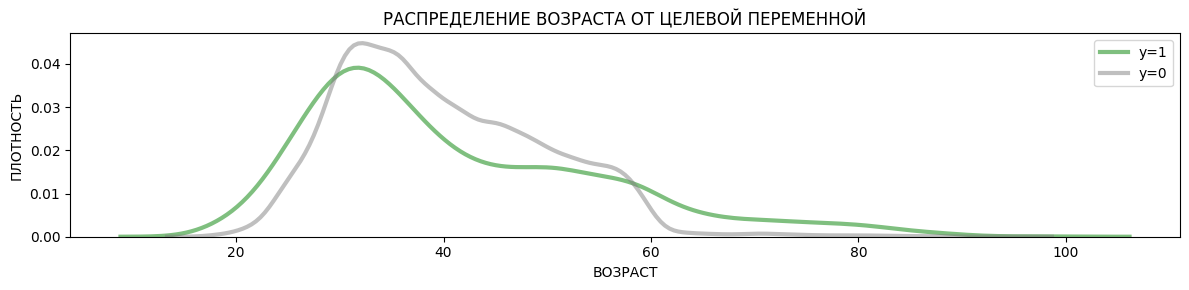

In [181]:
# Установка размера фигуры
plt.figure(figsize=(12, 3))

sns.kdeplot(data=data_[data_['y'] == 1].age, color='green', label='y=1', alpha=0.5, linewidth=3)
sns.kdeplot(data=data_[data_['y'] == 0].age, color='gray', label='y=0', alpha=0.5, linewidth=3)

# Добавление заголовка и наименование осей
plt.xlabel('ВОЗРАСТ', fontsize=10)
plt.ylabel('ПЛОТНОСТЬ', fontsize=10)
plt.title('РАСПРЕДЕЛЕНИЕ ВОЗРАСТА ОТ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ', fontsize=12)
plt.legend()

# Показать график
plt.tight_layout()
plt.show()

In [182]:
# Наблюдается расхождения в группах возраста 15-30, 30-60, 60-90. Выполним сегментацию.
# Создание нового флага 'age_segment', отражающего сегментацию возраста
data_['age_segment'] = pd.cut(data_['age'], bins=[0, 30, 60, 100], labels=['young', 'adult', 'retired']).astype('object')
pd.DataFrame(data_['age_segment'])

,age_segment
0,adult
1,adult
2,young
3,adult
4,adult
...,...
39378,adult
39379,adult
39380,adult
39381,adult


In [183]:
# Создаем списки месяцев для каждого сезона
winter = ['dec', 'jan', 'feb']
spring = ['mar', 'apr', 'may']
summer = ['jun', 'jul', 'aug']
automn = ['sep', 'oct', 'nov']

# Создаем новый столбец 'flg_season' и инициализируем его значением 'automn'
data_['flg_season'] = 'automn'

# Заменяем значение 'flg_season' в соответствии с месяцами каждого сезона
data_.loc[data_.month.isin(winter), 'flg_season'] = 'winter'
data_.loc[data_.month.isin(spring), 'flg_season'] = 'spring'
data_.loc[data_.month.isin(summer), 'flg_season'] = 'summer'
data_['flg_season'] 


0        summer
1        automn
2        summer
3        spring
4        summer
          ...  
39378    summer
39379    spring
39380    spring
39381    automn
39382    spring
Name: flg_season, Length: 39383, dtype: object

## 2.4 Гипотеза о образовании клиента
Возможно, есть связь между профессиональной деятельностью и уровнем образования клиента, которая может влиять на решение о вкладе. Например, высокообразованные специалисты могут иметь более высокую финансовую грамотность и больше доверия к банковским продуктам.

In [184]:
# Создание комбинированного параметра 'job_education' путем объединения значений из столбцов 'job' и 'education'
data_['job_education'] = data_['job'] + '_' + data_['education']

# Группировка данных по комбинированному параметру 'job_education' и расчет среднего значения целевой переменной 'y' для каждой группы
pd.DataFrame(data_.groupby('job_education', as_index=False).y.mean()).sort_values('y', ascending=False)


,job_education,y
43,retired_illiterate,0.666667
20,entrepreneur_illiterate,0.500000
63,student_basic.6y,0.500000
66,student_professional.course,0.390244
68,student_unknown,0.351852
...,...,...
26,housemaid_basic.9y,0.011111
4,admin._illiterate,0.000000
28,housemaid_illiterate,0.000000
87,unknown_professional.course,0.000000


In [185]:
# Рассчет среднего значения целевой переменной 'y' для каждой группы 'job_education' и сохранение в новом столбце
data_['job_education'] = data_.groupby('job_education', as_index=False).y.transform('mean')

## 2.5 Гипотеза о комбинации возраста и образования: 
Молодые клиенты с низким уровнем образования могут иметь менее устойчивые финансовые потребности и меньше интереса к долгосрочному инвестированию, что может отразиться на их склонности к открытию вкладовРассмотрим распределения возраст - образование в контексте целевой переменной

Text(99.84722222222221, 0.5, 'ОБРАЗОВАНИЕ')

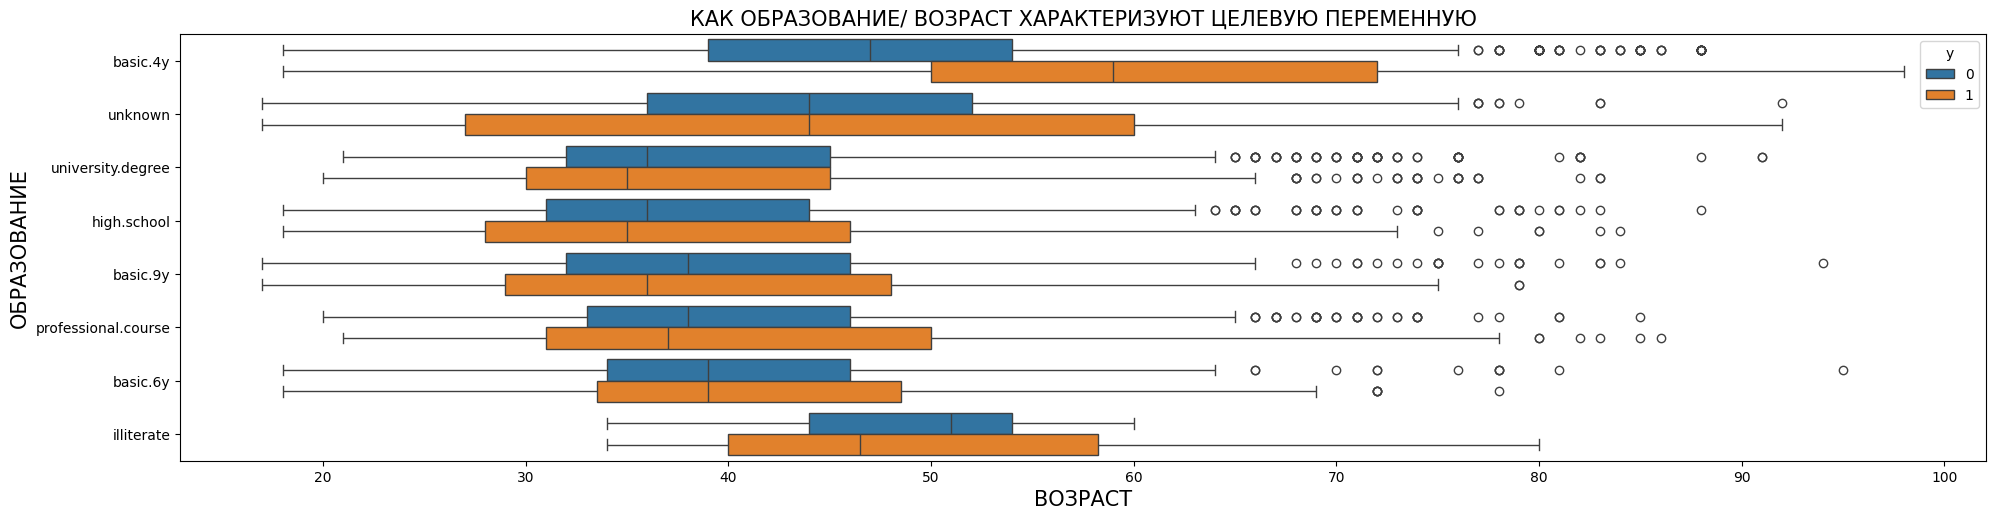

In [186]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data_, x='age', y='education', hue='y')

plt.tight_layout()
plt.title('КАК ОБРАЗОВАНИЕ/ ВОЗРАСТ ХАРАКТЕРИЗУЮТ ЦЕЛЕВУЮ ПЕРЕМЕННУЮ', fontsize=15)
plt.xlabel('ВОЗРАСТ', fontsize=15)
plt.ylabel('ОБРАЗОВАНИЕ', fontsize=15)

In [187]:
# Примечание возраст вкладчиков действительно изменяется в зависимости от образования, для создания счетчика применим деление 2 года чтобы охватить разницу сегментов*
# Создание нового параметра 'age_education', отражающего сегментацию возраста и образования
data_['age_education'] = pd.cut(data_['age'], bins=list(range(30, 60, 2)), labels=list(range(30, 58, 2)))
data_['age_education'] = data_['education'] + '_' + data_['age_education'].map(str)

# Группировка данных по комбинированному параметру 'age_education' и расчет среднего значения целевой переменной 'y' для каждой группы
pd.DataFrame(data_.groupby('age_education', as_index=False).y.mean()).sort_values('y', ascending=False)

,age_education,y
61,illiterate_40,0.500000
67,illiterate_nan,0.500000
60,illiterate_32,0.333333
112,unknown_nan,0.302222
14,basic.4y_nan,0.282971
...,...,...
8,basic.4y_46,0.003584
66,illiterate_54,0.000000
63,illiterate_44,0.000000
62,illiterate_42,0.000000


In [188]:
# Внедрение - рассчет среднего значения целевой переменной 'y' для каждой группы 'age_education' и сохранение в новом столбце
data_['age_education'] = data_.groupby('age_education').y.transform('mean')

## 2.6 Гипотеза: О выгодных ставках и низком коэффициенте вариации безработицы
Комбинация низкого коэффициента вариации безработицы и высоких ставок на вклады может стимулирует физ лица к откладыванию денег на вклады.

<Axes: xlabel='emp.var.rate_bin,euribor3m_bin'>

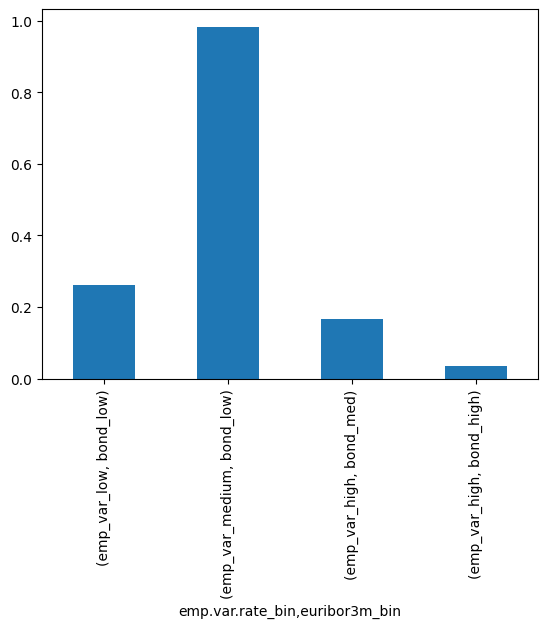

In [189]:
# Создание категорий для коэффициента безработицы и ставки банка
data_['emp.var.rate_bin'] = pd.cut(data_['emp_var_rate'], bins=3, labels=['emp_var_low', 'emp_var_medium', 'emp_var_high'])
data_['euribor3m_bin'] = pd.cut(data_['euribor3m'], bins=3, labels=['bond_low', 'bond_med', 'bond_high'])

# Группировка данных по категориям коэффициента безработицы, ставки банка и целевой переменной
grouped_data = data_.groupby(['emp.var.rate_bin', 'euribor3m_bin', 'y']).size().unstack()
grouped_data['emp_var_rate_to_euribor3m_bin_ratio'] = grouped_data[1] / grouped_data[0]
grouped_data['emp_var_rate_to_euribor3m_bin_ratio'].dropna().plot(kind='bar')

In [190]:
# Внедрение - добавим признак в общую таблицу
data_ = pd.merge(data_, grouped_data['emp_var_rate_to_euribor3m_bin_ratio'].dropna().reset_index(),
                                on=['emp.var.rate_bin', 'euribor3m_bin'], 
                                how='left')
# Удалим функциональные колонки для объединения
data_.drop(['emp.var.rate_bin', 'euribor3m_bin'], axis=1, inplace=True)
data_

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr_employed,y,calls_to_duration,euribor3m_to_cons_price_idx,age_segment,flg_season,job_education,age_education,emp_var_rate_to_euribor3m_bin_ratio
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,4.963,5228.1,0,0.052339,-0.165036,adult,summer,0.042381,0.031746,0.036746
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,4.021,5195.8,0,0.035774,-0.156323,adult,automn,0.094527,0.037975,0.036746
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0.729,4991.6,1,0.666667,-1.386169,young,summer,0.117825,0.187720,0.982759
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,1.405,5099.1,0,0.052339,1.059867,adult,spring,0.065887,0.061667,0.261801
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0.869,5076.2,1,0.149300,3.672969,adult,summer,0.306087,0.093645,0.261801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39378,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,4.866,5228.1,0,0.052339,1.137516,adult,summer,0.217054,0.159798,0.036746
39379,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,4.860,5191.0,0,0.052339,0.539460,adult,spring,0.107221,0.061728,0.036746
39380,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,4.857,5191.0,0,0.004937,0.538187,adult,spring,0.134209,0.099684,0.036746
39381,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,0.742,5017.5,0,0.052339,3.196370,adult,automn,0.093848,0.090129,0.261801


## 2.7 Гипотеза: Влияние образования и наличия жилищного кредита на решение о депозите:
Гипотеза клиенты с высшим образованием и без жилищного кредита имеют более высокую вероятность открывать депозит.

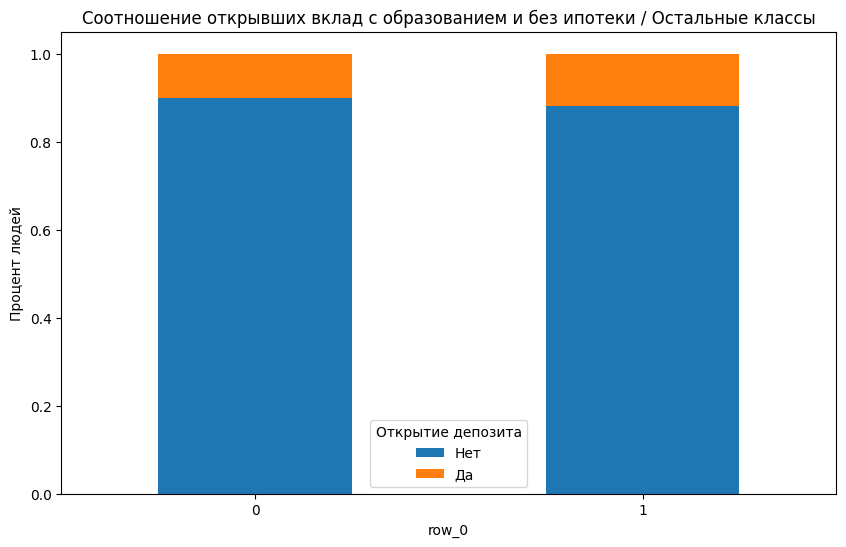

In [191]:
#(['basic.4y', 'unknown', 'university.degree', 'high.school','basic.9y', 'professional.course', 'basic.6y', 'illiterate'],dtype=object)
# Создаем бинарный параметр "education_housing"
cross_tab = ((data_['education'].isin(['university.degree', 'professional.course'])) & (data_['housing'] == 'no')).astype(int)

# Проверяем распределение нового параметра по целевой переменной
pd.crosstab(cross_tab, data_['y'], normalize='index') \
                                                    .plot(kind='bar', 
                                                    figsize=(10, 6), 
                                                    stacked=True)

# Настройка лейблов и заголовка
plt.title('Соотношение открывших вклад с образованием и без ипотеки / Остальные классы')
plt.ylabel('Процент людей')
plt.xticks(rotation=0)
plt.legend(title='Открытие депозита', labels=['Нет', 'Да'])

# Гипотеза не подтверждается

## 2.8 Опциональная гипотеза. Отсутствие предыдущего контакта может создать интерес или недоверие в период низкого индекса товаров

Text(0, 0.5, 'Индекс цен потребительского рынка')

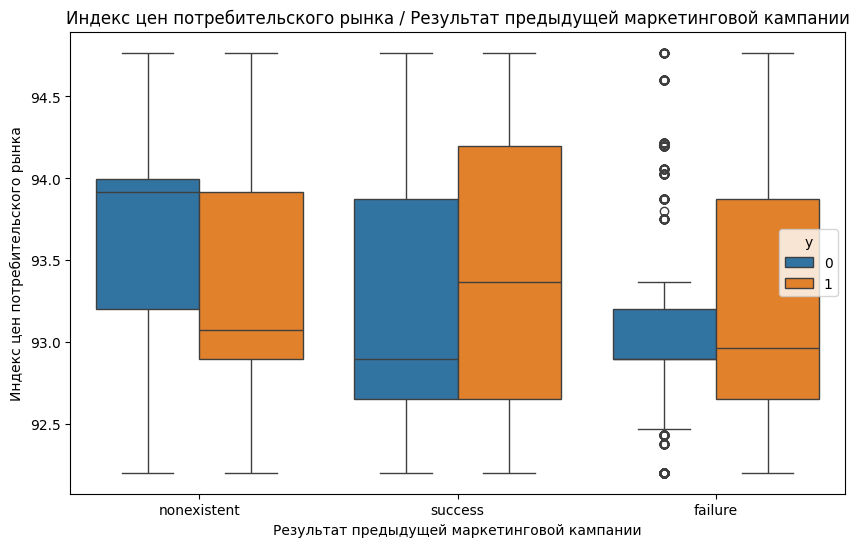

In [192]:
# Наблюдается хорошая характеризующая способность у комбинации
plt.figure(figsize=(10, 6))
sns.boxplot(y='cons_price_idx', x='poutcome', data=data_, hue='y')

# Добавление подписей
plt.title('Индекс цен потребительского рынка / Результат предыдущей маркетинговой кампании')
plt.xlabel('Результат предыдущей маркетинговой кампании')
plt.ylabel('Индекс цен потребительского рынка')

In [193]:
# Разделение параметра cons.price.idx на 9 бинов и создание комбинированного параметра
data_['cons_price_idx_poutcome'] = pd.cut(data_['cons_price_idx'], bins=9, labels=np.linspace(92.5, 94.5, 9)).astype(str) + '_' + data_['poutcome'].astype(str)
data_['cons_price_idx_poutcome'] = data_.groupby('cons_price_idx_poutcome').y.transform('mean')

pd.DataFrame(data_['cons_price_idx_poutcome'])


,cons_price_idx_poutcome
0,0.049860
1,0.096901
2,0.778523
3,0.096901
4,0.625483
...,...
39378,0.049670
39379,0.036561
39380,0.036561
39381,0.324649


# 3. ПРЕДОБРАБОТКА

## 3.1 Работа с выбросами

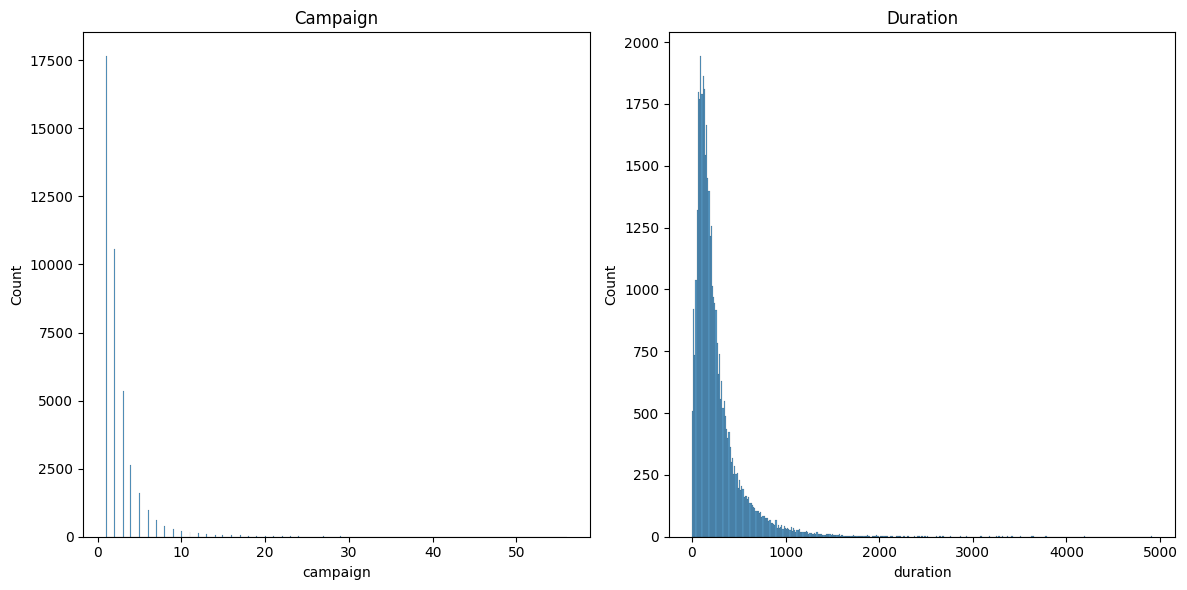

In [19]:
# Выведем ранее выявленные признаки с выбросами
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График для признака 'campaign'
sns.histplot(data_.campaign, ax=axes[0])
axes[0].set_title('Campaign')

# График для признака 'duration'
sns.histplot(data_.duration, ax=axes[1])
axes[1].set_title('Duration')

# Показываем графики
plt.tight_layout()
plt.show()

In [20]:
# Удалим выбросы с замером удаленной части 
before = data_.shape[0]
data_ = data_[data_.campaign.between(data_.campaign.quantile(q=0),data_.campaign.quantile(q=0.97))]
data_ = data_[data_.duration.between(data_.duration.quantile(q=0),data_.duration.quantile(q=0.97))]
after = data_.shape[0]

print(f'УДАЛЕНЫ {before - after} СТРОК ({round((1- before/after)*100, 2)}% ДАТАСЕТА)')


УДАЛЕНЫ 2296 СТРОК (-5.9% ДАТАСЕТА)


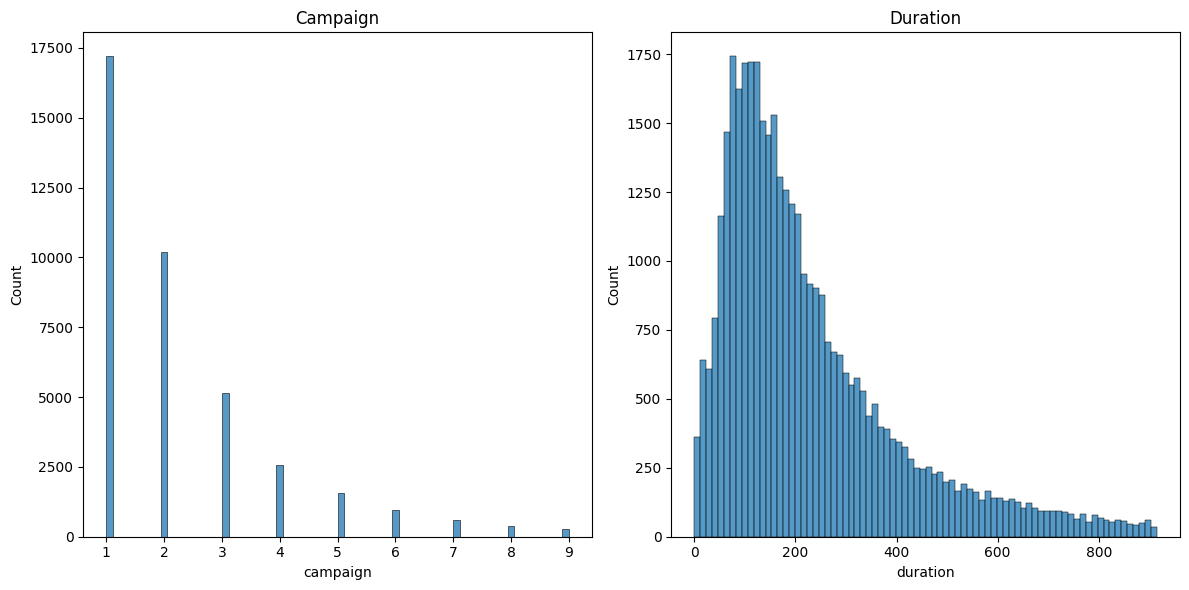

In [21]:
# Выведем ранее выявленные признаки с выбросами
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График для признака 'campaign'
sns.histplot(data_.campaign, ax=axes[0])
axes[0].set_title('Campaign')

# График для признака 'duration'
sns.histplot(data_.duration, ax=axes[1])
axes[1].set_title('Duration')

# Показываем графики
plt.tight_layout()
plt.show()

## **3.5 Анализ распределения значений параметров**

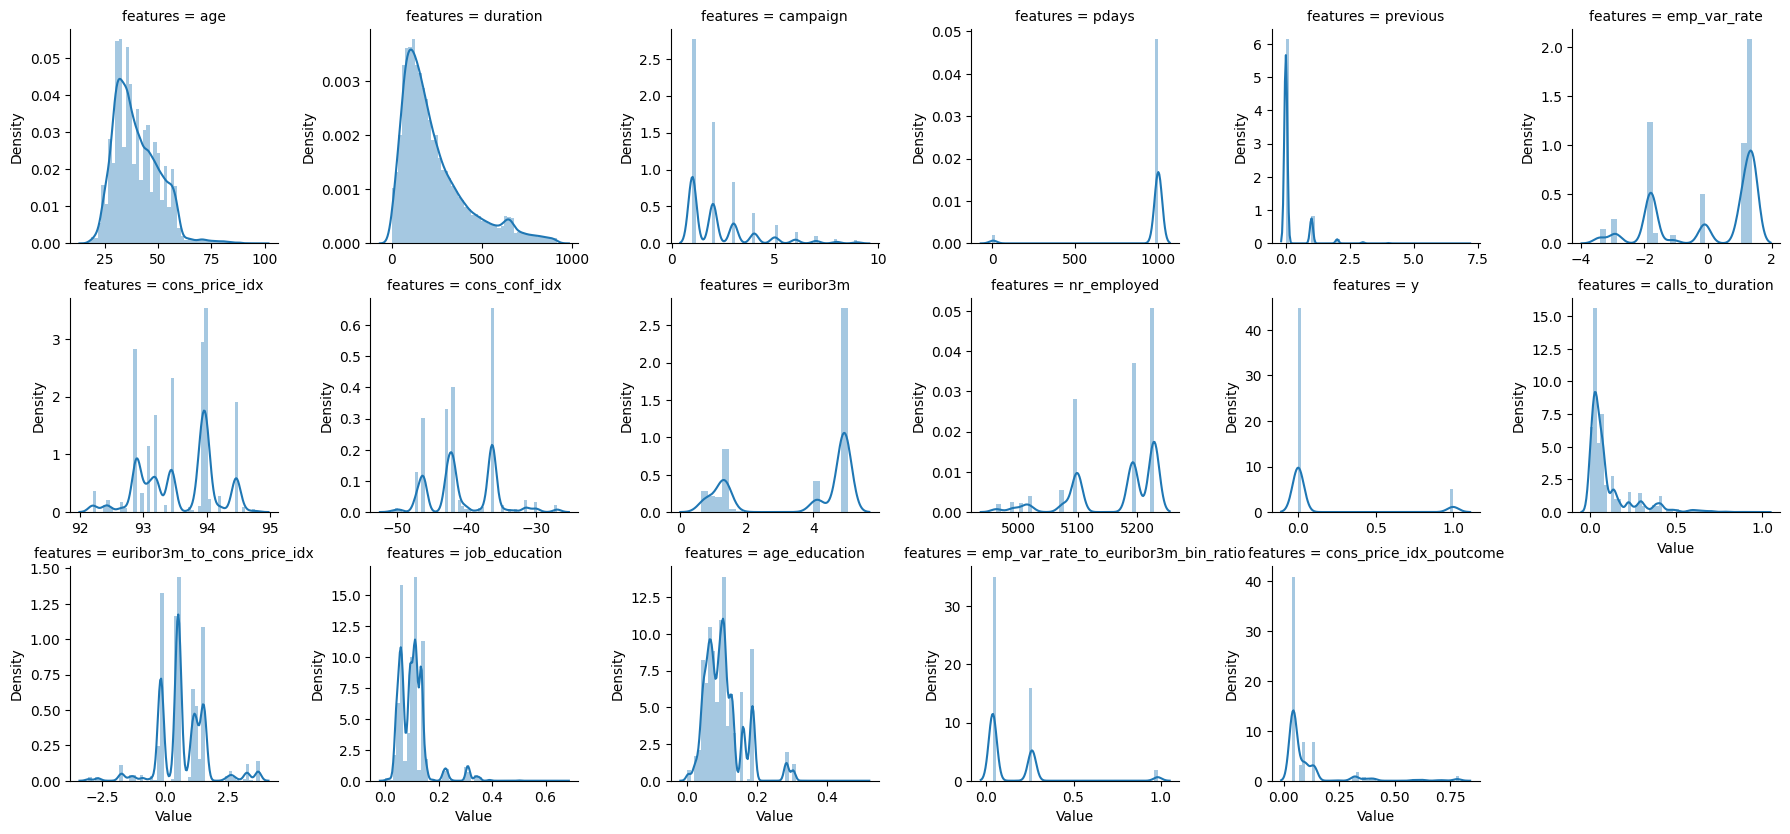

In [158]:
#Подготовим даные для FacetGrid чтобы вывести все распределения 
numeric_data_ = data_.select_dtypes(exclude=['object', 'category']) \
                                .stack() \
                                .reset_index() \
                                .rename({'level_1':'features', 0:'Value'}, axis=1)
# Передаем в FacetGrid - Distplot
ax = sns.FacetGrid(numeric_data_,col='features', col_wrap=6,sharex=False, sharey=False)
ax = ax.map(sns.distplot, 'Value')

plt.subplots_adjust(top=0.9)

*Промежуточный вывод - распределение 'age', 'duration', 'campaign', 'pdays' выглядет не нормальным, выолним логарифмирование чтобы модель могла с ними работать и повторим вывод графиков*

In [194]:
# Выолним логарифмирование чтобы модель могла с ними работать и повторим вывод графиков
for i in ['age', 'duration', 'campaign', 'pdays']:
    data_[i] = np.log(data_[i] + 1)

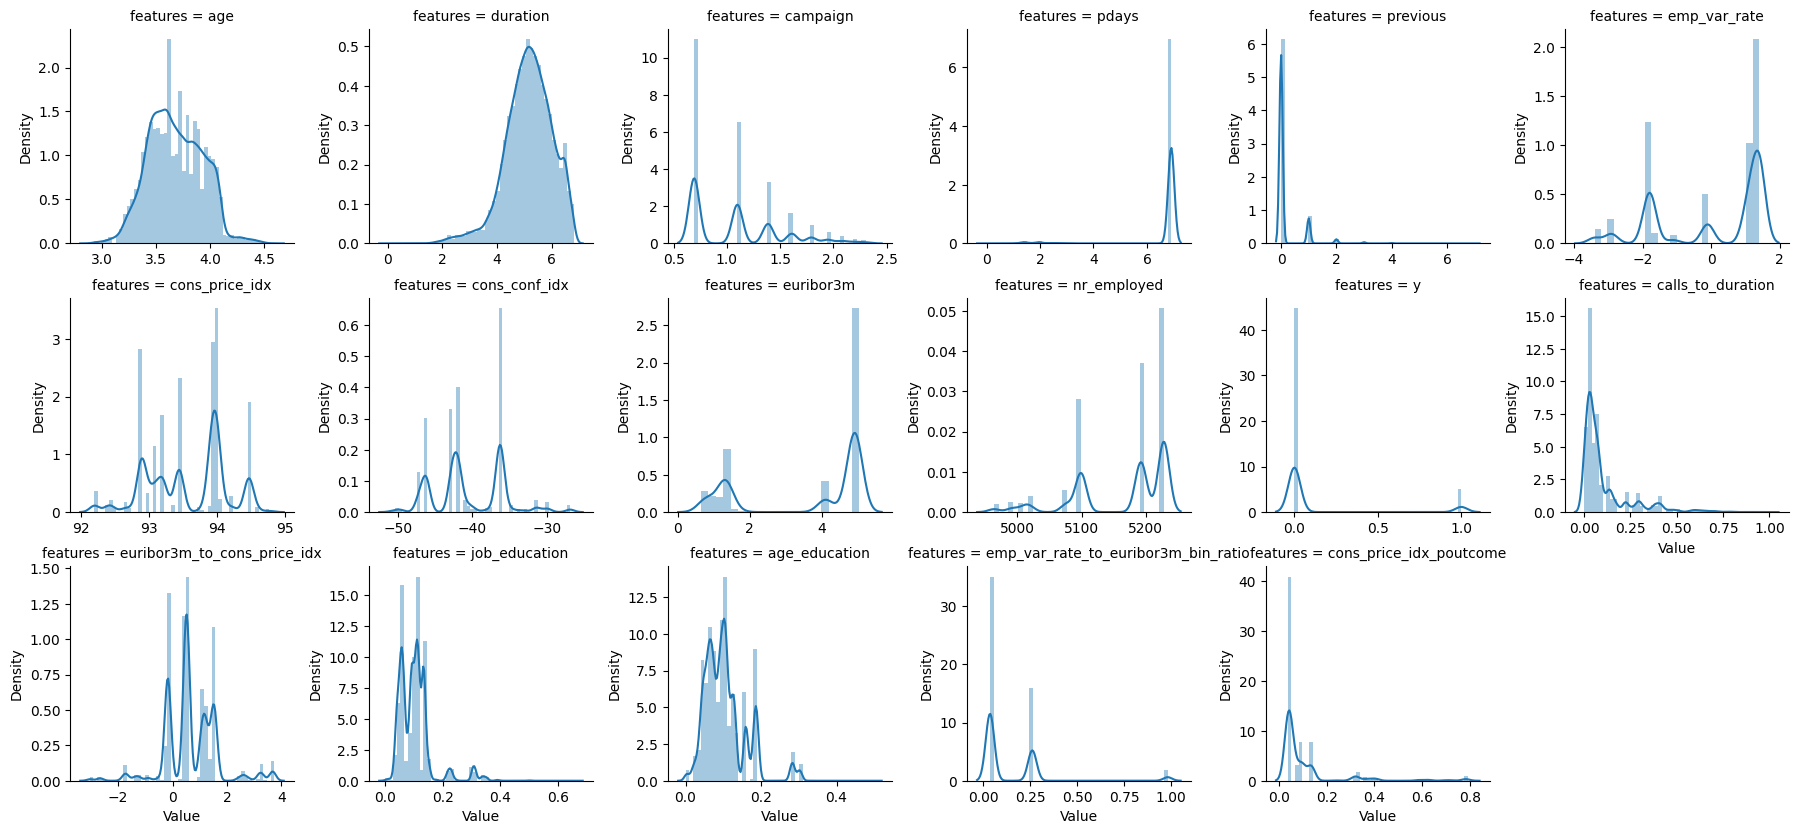

In [160]:
#Подготовим даные для FacetGrid чтобы вывести все распределения 
numeric_data_ = data_.select_dtypes(exclude=['object', 'category']) \
                                .stack() \
                                .reset_index() \
                                .rename({'level_1':'features', 0:'Value'}, axis=1)
# Передаем в FacetGrid - Distplot
ax = sns.FacetGrid(numeric_data_,col='features', col_wrap=6, sharex=False, sharey=False)
ax = ax.map(sns.distplot, 'Value')

plt.subplots_adjust(top=0.9)

## 3.3 Преобразование категориальных переменных

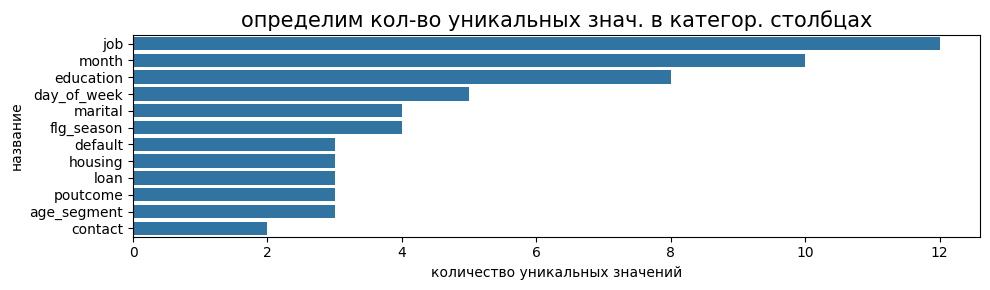

In [166]:
# Определим количеством уникальных значений в категориальных столбцах для выбора метода преобразования переменных
uniq_categorical_values = pd.DataFrame(data_
                                       .select_dtypes(['object','category'])
                                       .nunique()
                                       .sort_values(ascending=False))

# Создание графика
plt.figure(figsize=(10, 3))
sns.barplot(data=uniq_categorical_values, x=0, y=uniq_categorical_values.index)

plt.xlabel('количество уникальных значений', fontsize=10)
plt.ylabel('название', fontsize=10)
plt.title('определим кол-во уникальных знач. в категор. столбцах', fontsize=15)

plt.tight_layout()
plt.show()

*Примечание - количество значений не критичное, поэтому используем простой метод фиктивных переменных*

In [195]:
data_.drop('month', axis=1, inplace=True)
# Преобразование категориальных переменных в фиктивные переменные и объединение их с числовыми признаками
dummy_variables = pd.get_dummies(data_
                                 .select_dtypes(['object','category']), 
                                 drop_first=True) \
                                .astype(int)
collected_df = pd.merge(data_ \
                                .select_dtypes(exclude=['object','category']), 
                                dummy_variables, 
                                left_index=True, 
                                right_index=True)

## 3.4 Корреляция. Устранение мультиколлинеарности

Text(0.5, 1.0, 'КОРРЕЛЯЦИЯ ЧИСЛОВЫХ ПАРАМЕТРОВ')

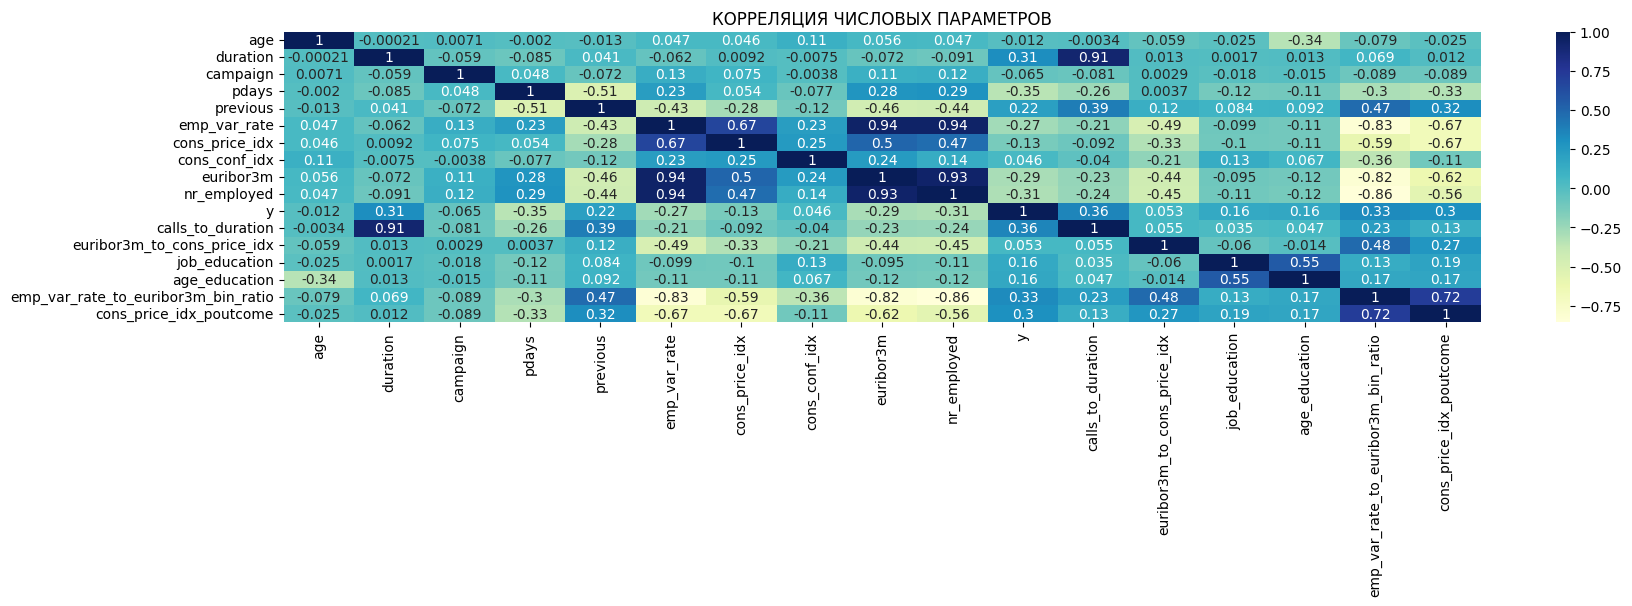

In [163]:
# Определим обладает ли наша выборка мультиколлиниарностью
plt.figure(figsize=(18,6))
sns.heatmap(data_.select_dtypes(exclude=['object', 'category']).corr(method='spearman'), annot=True, cmap='YlGnBu')
plt.tight_layout()
plt.title('КОРРЕЛЯЦИЯ ЧИСЛОВЫХ ПАРАМЕТРОВ')

In [196]:
# Получение списка всех признаков для использования в последующем анализе корреляции
all_features = list(collected_df.corr().columns)
TARGET = 'y'  # Целевая переменная

f_to_del = []  # Список признаков для удаления
cor_score = collected_df.corr()  # Вычисление матрицы корреляции

# Проход по каждой паре столбцов в матрице корреляции
for i in cor_score.columns:
    if i == TARGET:
        continue
    for j in cor_score.index:
        if all_features.index(j) >= all_features.index(i) or j == TARGET:
            continue
        else:
            if abs(cor_score.loc[i, j]) > 0.9:
                # Определение, какой признак удалить на основе его корреляции с целевой переменной
                if abs(cor_score.loc[TARGET, i]) > abs(cor_score.loc[TARGET, j]):
                    f_to_del.append(j)
                else:
                    f_to_del.append(i)

# Удаление списка признаков из объединенного датафрейма
collected_df.drop(f_to_del, axis=1, inplace=True)

print(f'Удалены {len(f_to_del)} колонок: {f_to_del}')


Удалены 5 колонок: ['emp_var_rate', 'emp_var_rate', 'euribor3m', 'loan_unknown', 'poutcome_success']


In [203]:
# Экспорт файла для работы с моделями
collected_df.to_csv('data\export\export.csv')